# Laboratorio 9

### Rodolfo Rojas 20160315

In [1]:
#pip install nltk

In [2]:
#pip install textblob

In [3]:
import pandas as pd
import numpy as np
import re
from collections import Counter
from textblob import TextBlob
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer 
import re
import string as str

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/joserodolforojasmazariegos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/joserodolforojasmazariegos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
data = pd.read_csv("Joker_tweets.csv",sep=',',encoding = "utf-8")

In [5]:
data.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,Είναι επίσημο: μας ξεπέρασαν στο #Joker factor...,False,0,NaN,2019-10-28T20:01:20Z,False,NaN,1188908628947935234,NaN,"<a href=""http://twitter.com/download/iphone"" r...",starman9,0,False,False,NaN,NaN
1,RT @JusticeLeaguerz: All the versions of the J...,False,0,NaN,2019-10-28T20:01:20Z,False,NaN,1188908626221719560,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",migTei,14,True,False,NaN,NaN
2,RT @PTimm82: Finished the Joker Poker Piece! I...,False,0,NaN,2019-10-28T20:01:19Z,False,NaN,1188908623600082944,NaN,"<a href=""http://twitter.com/download/iphone"" r...",TheParsa2,1635,True,False,NaN,NaN
3,the dance of freedom. the death bells. the ris...,False,0,NaN,2019-10-28T20:01:19Z,True,NaN,1188908622086103042,NaN,"<a href=""http://twitter.com/download/iphone"" r...",itzybitzyfitzy_,0,False,False,NaN,NaN
4,RT @chowell1210: LOOK AT WHAT MY LOCAL BEACH I...,False,0,NaN,2019-10-28T20:01:18Z,False,NaN,1188908620978806784,NaN,"<a href=""http://twitter.com/download/android"" ...",EB_Movies,25,True,False,NaN,NaN


## Pregunta 3
### Funcion Normalizadora

In [6]:
def word_norm(text):
  text = text.str.lower()
  text = text.replace('.', '')
  text = text.replace(',', '')
  text = text.replace('!', '')
  text = text.replace(to_replace =r'!', value='',regex=True)
  text = text.replace('á', 'a')
  text = text.replace('é', 'e')
  text = text.replace('í', 'i')
  text = text.replace('ó', 'o')
  text = text.replace('ú', 'u')
  text = text.replace('?', '')
  text = text.replace('!', '')
  text = text.replace(to_replace =r'-', value='',regex=True)
  text = text.replace(')', '')
  text = text.replace('(', '')
  text = text.replace(':', '')
  text = text.replace('/', '')
  return(text)

In [7]:
data[['text']] = word_norm(data['text'])
data.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude
0,είναι επίσημο: μας ξεπέρασαν στο #joker factor...,False,0,NaN,2019-10-28T20:01:20Z,False,NaN,1188908628947935234,NaN,"<a href=""http://twitter.com/download/iphone"" r...",starman9,0,False,False,NaN,NaN
1,rt @justiceleaguerz: all the versions of the j...,False,0,NaN,2019-10-28T20:01:20Z,False,NaN,1188908626221719560,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",migTei,14,True,False,NaN,NaN
2,rt @ptimm82: finished the joker poker piece i'...,False,0,NaN,2019-10-28T20:01:19Z,False,NaN,1188908623600082944,NaN,"<a href=""http://twitter.com/download/iphone"" r...",TheParsa2,1635,True,False,NaN,NaN
3,the dance of freedom. the death bells. the ris...,False,0,NaN,2019-10-28T20:01:19Z,True,NaN,1188908622086103042,NaN,"<a href=""http://twitter.com/download/iphone"" r...",itzybitzyfitzy_,0,False,False,NaN,NaN
4,rt @chowell1210: look at what my local beach i...,False,0,NaN,2019-10-28T20:01:18Z,False,NaN,1188908620978806784,NaN,"<a href=""http://twitter.com/download/android"" ...",EB_Movies,25,True,False,NaN,NaN


### Adding New Columns

In [8]:
data['Handler']= '@'+data['screenName']
data['Source']=data.statusSource.str.extract(r'(>.*</a>)', expand=False)
data['Source']= data.Source.str.slice(start=1, stop= -4 )

In [9]:
data.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted,longitude,latitude,Handler,Source
0,είναι επίσημο: μας ξεπέρασαν στο #joker factor...,False,0,NaN,2019-10-28T20:01:20Z,False,NaN,1188908628947935234,NaN,"<a href=""http://twitter.com/download/iphone"" r...",starman9,0,False,False,NaN,NaN,@starman9,Twitter for iPhone
1,rt @justiceleaguerz: all the versions of the j...,False,0,NaN,2019-10-28T20:01:20Z,False,NaN,1188908626221719560,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",migTei,14,True,False,NaN,NaN,@migTei,Twitter Web App
2,rt @ptimm82: finished the joker poker piece i'...,False,0,NaN,2019-10-28T20:01:19Z,False,NaN,1188908623600082944,NaN,"<a href=""http://twitter.com/download/iphone"" r...",TheParsa2,1635,True,False,NaN,NaN,@TheParsa2,Twitter for iPhone
3,the dance of freedom. the death bells. the ris...,False,0,NaN,2019-10-28T20:01:19Z,True,NaN,1188908622086103042,NaN,"<a href=""http://twitter.com/download/iphone"" r...",itzybitzyfitzy_,0,False,False,NaN,NaN,@itzybitzyfitzy_,Twitter for iPhone
4,rt @chowell1210: look at what my local beach i...,False,0,NaN,2019-10-28T20:01:18Z,False,NaN,1188908620978806784,NaN,"<a href=""http://twitter.com/download/android"" ...",EB_Movies,25,True,False,NaN,NaN,@EB_Movies,Twitter for Android


## Pregunta 4 </b>
### Corpus

In [10]:
def create_corpus(df):
    df['text'] = df['text']
    df['Handler'] = df.Handler
    df['Source'] = df.Source
    new_data = df[['text','Handler','Source','retweetCount','favoriteCount']]
    return new_data

In [11]:
new_data = create_corpus(data)

## Pregunta 5 </b>
### Lematizacion

In [12]:
def Lemmatization(text):
    lemmatizer = WordNetLemmatizer() 
    tokeniced_text = nltk.word_tokenize(sentence)
    lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in tokeniced_text])
    return(lemmatized_output)
    
    

In [13]:
new_data['lem_text'] = word_norm(new_data['text'])
new_data[['text','lem_text']].head(10)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,text,lem_text
0,είναι επίσημο: μας ξεπέρασαν στο #joker factor...,είναι επίσημο: μας ξεπέρασαν στο #joker factor...
1,rt @justiceleaguerz: all the versions of the j...,rt @justiceleaguerz: all the versions of the j...
2,rt @ptimm82: finished the joker poker piece i'...,rt @ptimm82: finished the joker poker piece i'...
3,the dance of freedom. the death bells. the ris...,the dance of freedom. the death bells. the ris...
4,rt @chowell1210: look at what my local beach i...,rt @chowell1210: look at what my local beach i...
5,me he visto el joker aka el jocoso y la vdd q ...,me he visto el joker aka el jocoso y la vdd q ...
6,rt @aquel_coche: ¡¡¿¿cómo que no has visto aún...,rt @aquel_coche: ¡¡¿¿cómo que no has visto aún...
7,"rt @tprincedelamour: #terrorisme hier soir, un...","rt @tprincedelamour: #terrorisme hier soir, un..."
8,rt @vitogesualdi: the media told us that the j...,rt @vitogesualdi: the media told us that the j...
9,yo en la vida. #joker\nvideo de moviethrill en...,yo en la vida. #joker\nvideo de moviethrill en...


## Pregunta 6 </b>
### Sentiment Analysize

In [14]:
def sentiment_analysis(text):
    polarity = []
    subjectivity = []
    for tw in text:
        tw = TextBlob(tw)
        ann = tw.sentiment
        polarity.append(ann[0])
        subjectivity.append(ann[1])
    return polarity,subjectivity

In [15]:
new_data['Polarity'], new_data['Subjectivity'] = sentiment_analysis(new_data.text)
new_data['Lem_Polarity'], new_data['Lem_Subjectivity'] = sentiment_analysis(new_data.lem_text)

/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
Pol_prom, Sub_prom = new_data.Polarity.mean(), new_data.Subjectivity.mean()
Lem_Pol_prom, Lem_Sub_prom = new_data.Lem_Polarity.mean(), new_data.Lem_Subjectivity.mean()

## Pregunta 7

In [17]:
print('Polarization:',Pol_prom, Lem_Pol_prom, '\nSubjectivity:',Sub_prom, Lem_Sub_prom)

Polarization: 0.051965218849205824 0.051965218849205824 
Subjectivity: 0.22222734797332297 0.22222734797332297


En este caso la lematizacion no parece haber afectado el resultado de ninguno de los datos calculados.

## Pregunta 8 </br>
    Lo que puedo decir acerca del sentimiento del corpus es que es dificil de predecir con tantas variacione, pues hay muchas imagenes, idiomas y slang (tanto de palabras como en escritura) utilizado que hace dificil entenderlo, ademas la lematizacion no corre de manera optima pues se está utilizando el default para el parametro pos.

## Pregunta 9 </br>
**a.** La Mayoria se origina en iPhones, seguidos por dispositivos Androids y en tercer puesto desde la web

In [18]:
new_data['Source'].value_counts().head(3)

Twitter for iPhone     4523
Twitter for Android    3732
Twitter Web App        1242
Name: Source, dtype: int64

**b.** El tweet mas popular es de @JVCom en frances mencionando el cumpleaños de Joaquin Phoenix con 421 favoritos y 69 retweets en un inicio esta parecia ser la respuesta sin embargo existe un tweet de @nick_fullerrrr, que tiene +151K retweets y mas de 550K favoritos, sin embargo en esta muestra no se encuentra el tweet original.

In [19]:
new_data[['Handler','text','favoriteCount', 'retweetCount']].sort_values(by=['favoriteCount', 'retweetCount'],ascending=False).head()

,Handler,text,favoriteCount,retweetCount
5823,@JVCom,"joachim phoenix fête ses 45 ans aujourd'hui, e...",421,69
5952,@RapUp,mr. and mrs. petty as the joker and harley qui...,256,54
2168,@cizgikafe,"joker, 1 milyon 588 bin seyirci ile türkiye'de...",256,7
9136,@iWolowitz,todos somos joker... \n\nhttps://t.co/ylbzr7vbio,180,69
7343,@blackthugali,"arkadaşından heath ledger (joker) hakkında , ç...",148,30


In [20]:
new_data[['Handler','text','favoriteCount', 'retweetCount']].sort_values(by=['retweetCount','favoriteCount'],ascending=False).head()

,Handler,text,favoriteCount,retweetCount
9569,@gt__003,rt @nick_fullerrrr: filmed the joker go crazy ...,0,151060
9584,@yourboigrocket,rt @nick_fullerrrr: filmed the joker go crazy ...,0,151060
9589,@Natalie_Fer01,rt @nick_fullerrrr: filmed the joker go crazy ...,0,151060
9649,@AceGamingz3000,rt @nick_fullerrrr: filmed the joker go crazy ...,0,151060
9667,@poipoionioni,rt @nick_fullerrrr: filmed the joker go crazy ...,0,151060


In [21]:
new_data[new_data['Handler']=='@nick_fullerrrr']

,text,Handler,Source,retweetCount,favoriteCount,lem_text,Polarity,Subjectivity,Lem_Polarity,Lem_Subjectivity


## Pregunta 10 (Extra) </b>
### Word Cloud

In [22]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


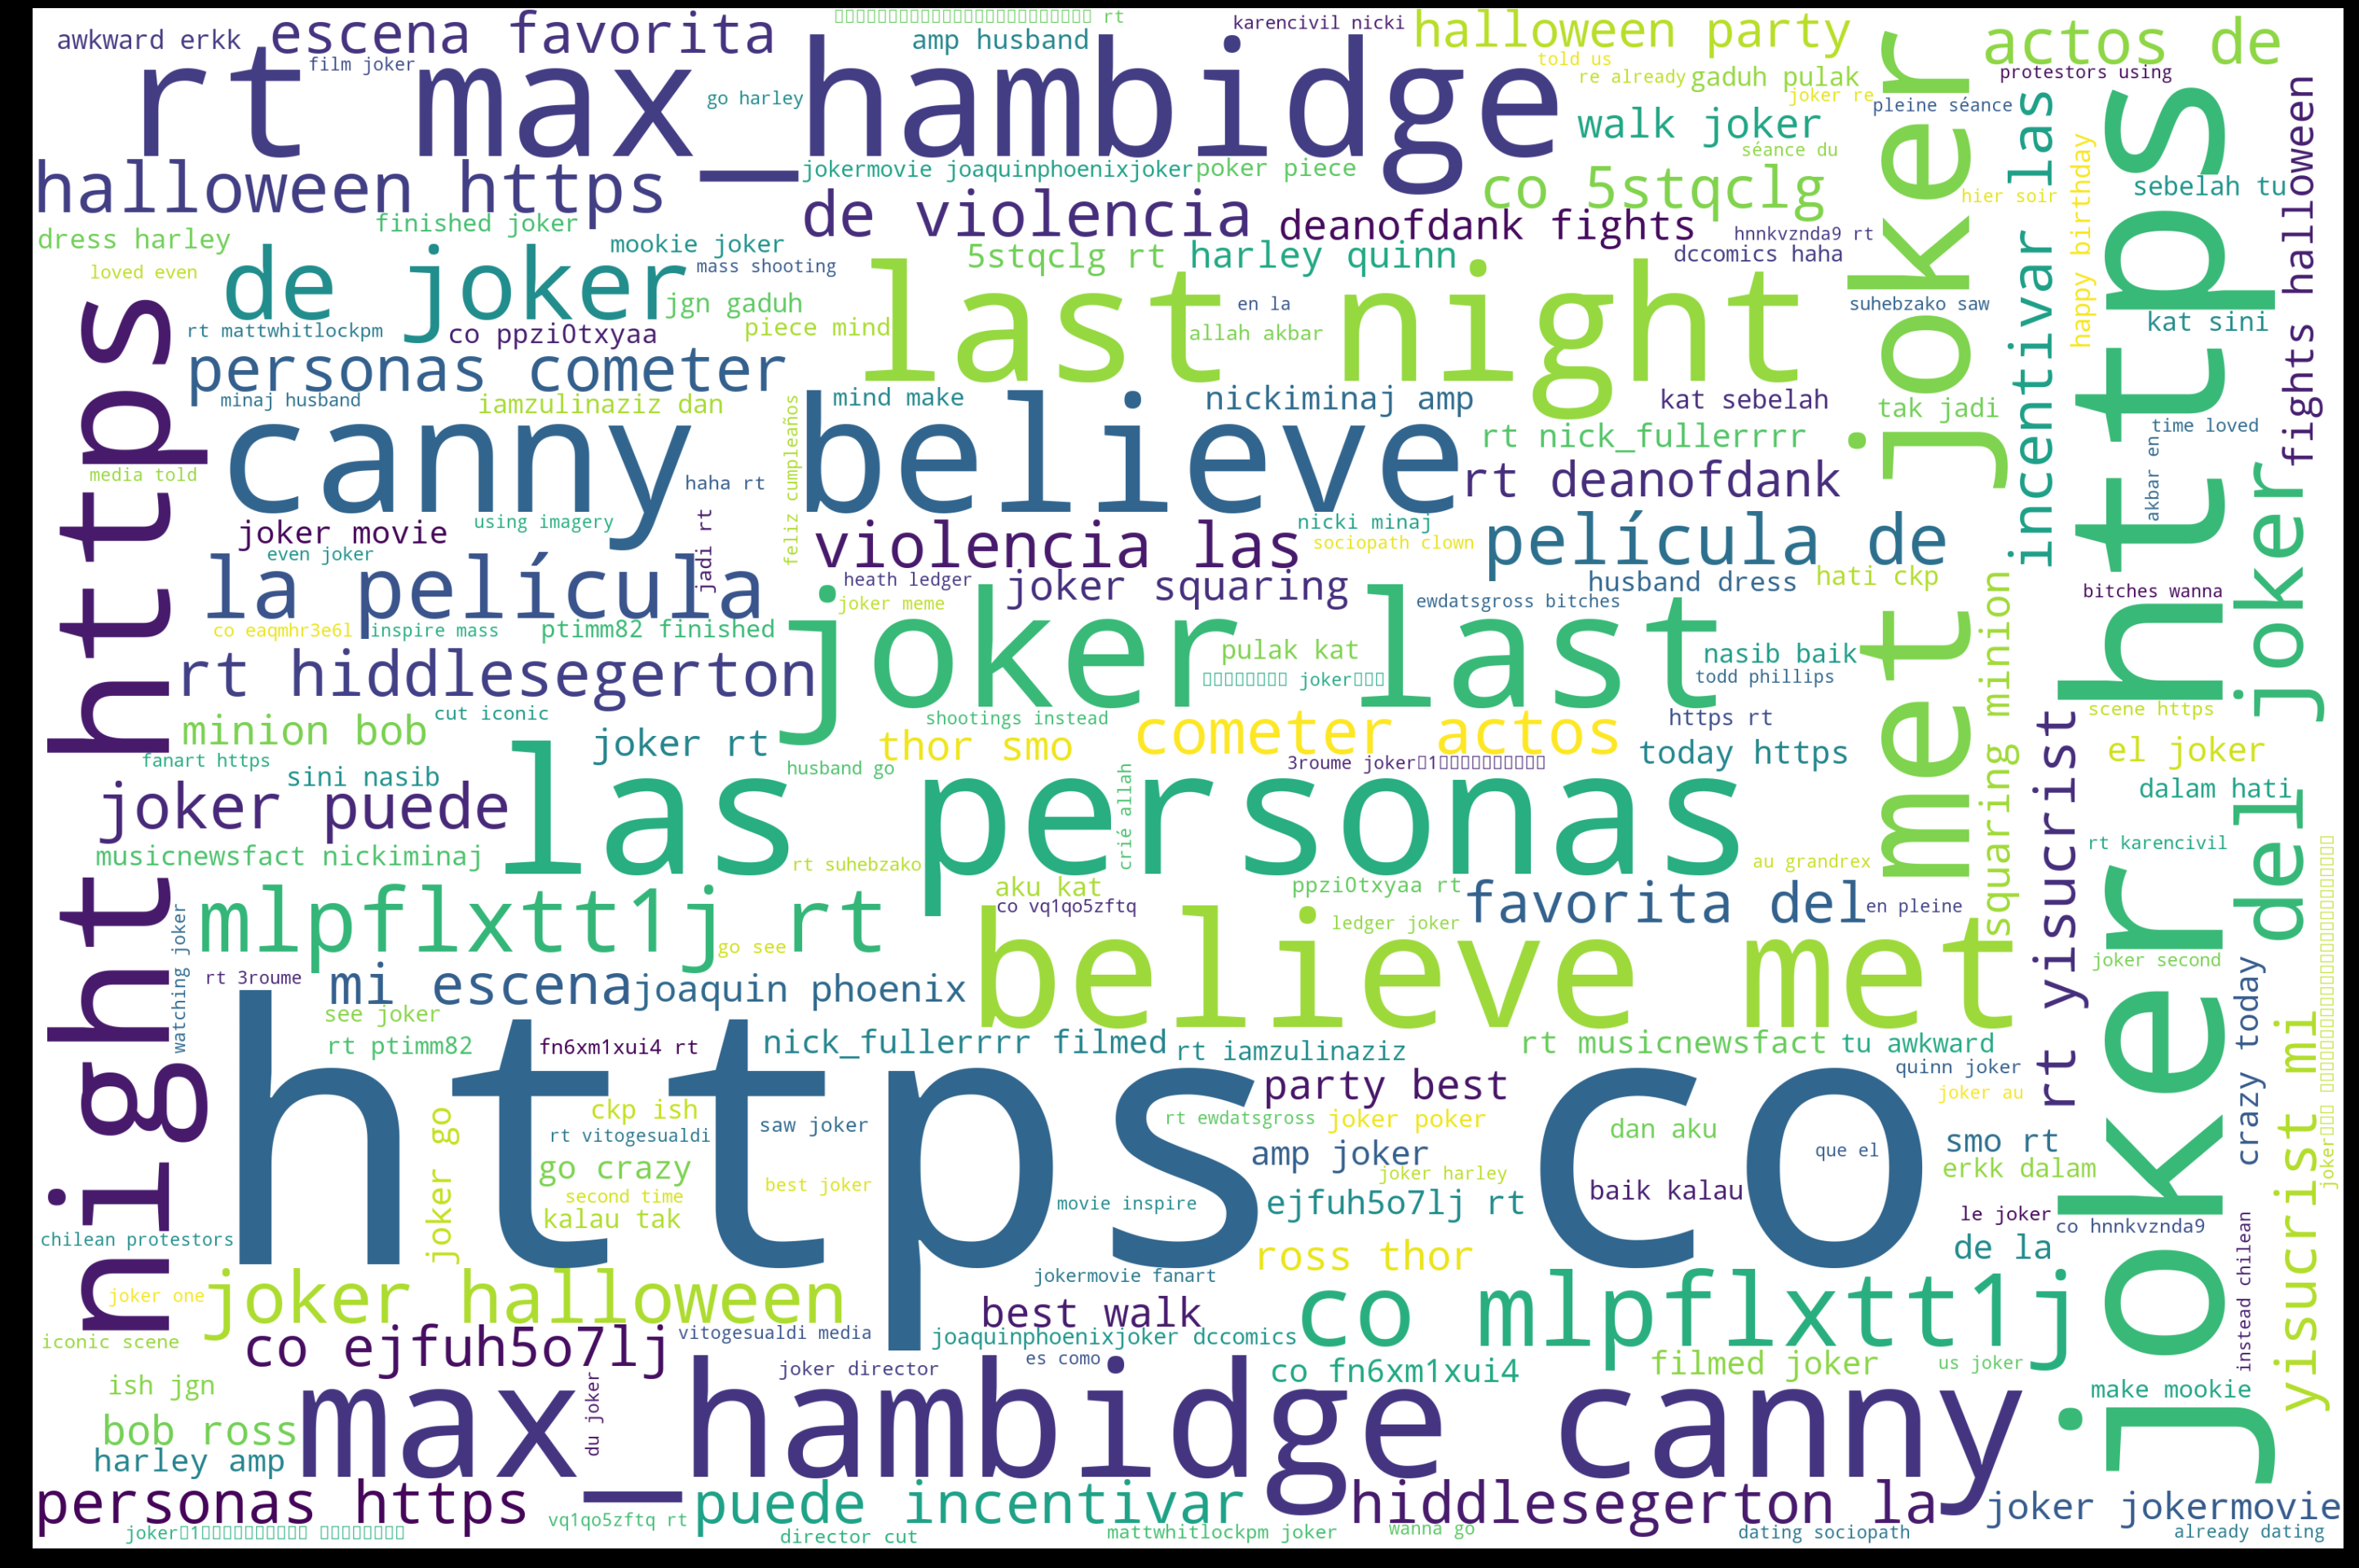

In [31]:
text = " ".join(tweet for tweet in new_data.lem_text)
stopwords = set(STOPWORDS)
stopwords.update(["http", "now", "wine", "flavor", "flavors"])
wordcloud = WordCloud(
    stopwords=STOPWORDS, 
    width = 3000,
    height = 2000,
    background_color="white").generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()